# Leer datasets

In [1]:
import pandas as pd
import numpy as np

moon = pd.read_csv('../data/moon_noisy.csv')
moon.head()

,X1,X2,X3,label
0,1.274793,0.387810,-0.554927,1
1,2.745242,-0.655700,0.013804,1
2,0.265539,0.080242,1.050148,1
3,1.935512,0.769467,0.180841,0
4,1.074349,-0.109922,0.546227,1


In [2]:
moon.drop(columns=['label'], inplace=True)

# Realizamos los clusters

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(moon)
kmeans_labels = kmeans.labels_
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(moon)
dbscan_labels = dbscan.labels_
print(dbscan_labels)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(moon)
gmm_labels = gmm.predict(moon)

[ 0 -1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1 -1 -1 -1  1 -1  1  2  0
 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1  1  1
 -1  1  1  1  1 -1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  3  0  1 -1  1  1
  1 -1  1 -1  1 -1  1  1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1 -1  1  1  2
  1 -1  1 -1  0 -1 -1  1  2  1 -1  1  1 -1 -1  1  1  1  3 -1 -1 -1 -1  1
  1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1  1  2  1 -1  1  1  1  1 -1  1  1
 -1 -1 -1  1 -1  1 -1  1  1  1 -1  3  1  1  1  1 -1  1  1  1  1 -1 -1  1
  1 -1  1  1  1 -1  1  1  1  0  3 -1 -1  1  1  1  1  2  1  1 -1 -1  1  1
 -1  1  1  1 -1 -1 -1  1  1 -1  0 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1
  1 -1  1  1  1  1  1  1  1  3 -1  1  1  1  0 -1 -1  3  1  1  1  1 -1  1
 -1  1  1  1  1 -1  1 -1  1  0  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1
  1  1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1  1  3  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1  2  1]


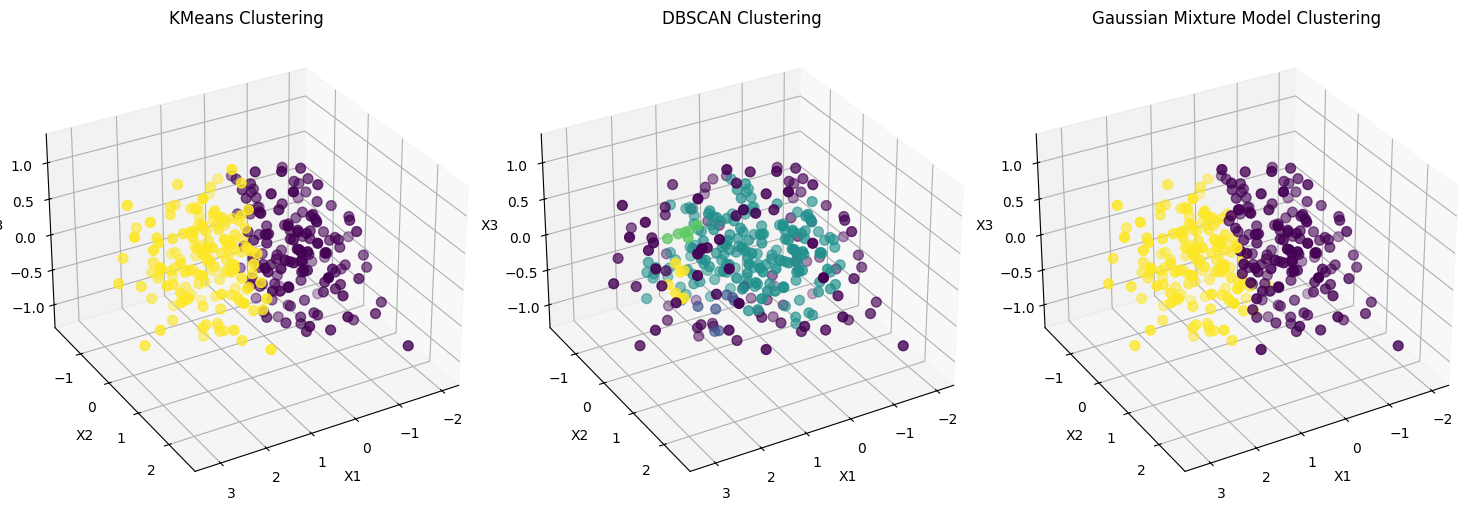

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=kmeans_labels, cmap='viridis', s=50)
ax1.set_title('KMeans Clustering')
ax1.set_xlabel(moon.columns[0])
ax1.set_ylabel(moon.columns[1])
ax1.set_zlabel(moon.columns[2])
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=dbscan_labels, cmap='viridis', s=50)
ax2.set_title('DBSCAN Clustering')
ax2.set_xlabel(moon.columns[0])
ax2.set_ylabel(moon.columns[1])
ax2.set_zlabel(moon.columns[2])
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.scatter(moon.iloc[:, 0], moon.iloc[:, 1], moon.iloc[:, 2], c=gmm_labels, cmap='viridis', s=50)
ax3.set_title('Gaussian Mixture Model Clustering')
ax3.set_xlabel(moon.columns[0])
ax3.set_ylabel(moon.columns[1])
ax3.set_zlabel(moon.columns[2])
ax1.view_init(elev=30, azim=60)
ax2.view_init(elev=30, azim=60)
ax3.view_init(elev=30, azim=60) 
plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
kmeans_silhouette = silhouette_score(moon, kmeans_labels)
dbscan_silhouette = silhouette_score(moon, dbscan_labels)
gmm_silhouette = silhouette_score(moon, gmm_labels)
print(f'KMeans Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette:.2f}')

KMeans Silhouette Score: 0.35
DBSCAN Silhouette Score: 0.25
Gaussian Mixture Model Silhouette Score: 0.34


# Interpretar

In [15]:
import sys
sys.path.append('..')
from ripper import MultiClassRipperClassifier
from dsgd import DSClassifierMultiQ
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree as sk_tree

## Kmeans

In [16]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(moon, kmeans_labels, test_size=0.2, random_state=42)


In [17]:
#muestrame los centros de los clusters
centers = kmeans.cluster_centers_
print("KMeans Cluster Centers:")
for i, center in enumerate(centers):
    print(f"Cluster {i}: {center}")

KMeans Cluster Centers:
Cluster 0: [-0.34697506  0.50916572  0.02163187]
Cluster 1: [ 1.31979461 -0.06178243 -0.03926095]


In [18]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.97


In [19]:
ripper.print_rules()


Reglas para clase: 0
[[X1=-0.95--0.49] V [X1=<-0.95] V [X1=-0.49--0.077] V [X1=-0.077-0.16] V [X1=0.16-0.43^X2=0.39-0.61] V [X1=0.16-0.43^X2=0.21-0.39] V [X1=0.16-0.43^X2=-0.1-0.069] V [X1=0.16-0.43^X3=>0.56] V [X1=0.16-0.43^X3=-0.71--0.46] V [X2=>1.1^X1=0.43-0.73] V [X2=0.89-1.1^X1=0.43-0.73]]

Reglas para clase: 1
[[X1=0.73-1.02] V [X1=1.02-1.29] V [X1=1.29-1.91] V [X1=>1.91] V [X1=0.43-0.73^X2=-0.1-0.069] V [X1=0.43-0.73^X2=0.069-0.21] V [X1=0.43-0.73^X2=-0.26--0.1] V [X2=<-0.63^X1=0.43-0.73] V [X1=0.43-0.73^X2=-0.63--0.26] V [X3=<-0.71^X1=0.16-0.43]]


Decision Tree Accuracy: 0.97


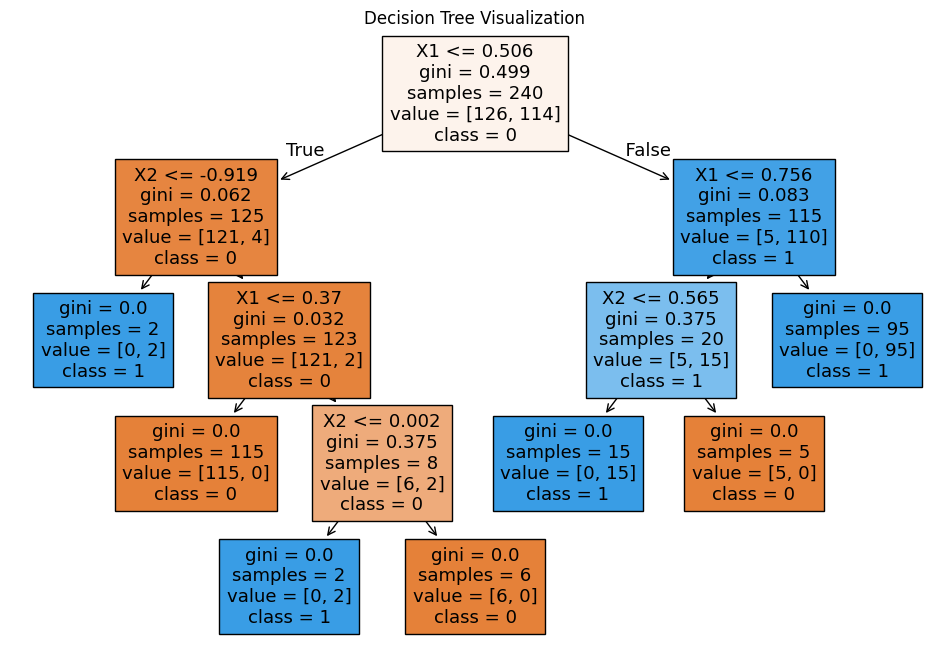

In [20]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [21]:
ds = DSClassifierMultiQ(2, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 8.38s, epochs: 200

Least training loss reached: 0.056


In [22]:
ds.print_most_important_rules(threshold=0.32)



Most important rules for class 0

	[0.811] R1: -0.262 < X1 < 0.443
			0: 0.811	1: 0.000	Unc: 0.189

	[0.762] R0: X1 < -0.262
			0: 0.762	1: 0.000	Unc: 0.238

	[0.534] R7: X2 > 0.708
			0: 0.534	1: 0.000	Unc: 0.466

Most important rules for class 1

	[0.779] R3: X1 > 1.148
			0: 0.000	1: 0.779	Unc: 0.221

	[0.750] R2: 0.443 < X1 < 1.148
			0: 0.000	1: 0.750	Unc: 0.250

	[0.377] R4: X2 < -0.194
			0: 0.000	1: 0.377	Unc: 0.623


In [23]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.97


## DBSCAN

In [24]:
#dividir los datos en entrenamiento y prueba
n_clusters = len(np.unique(dbscan_labels))
max_label = np.max(dbscan_labels)
dbscan_labels = np.where(dbscan_labels == -1, max_label + 1, dbscan_labels)  # Assign a new label for noise points
X_train, X_test, y_train, y_test = train_test_split(moon, dbscan_labels, test_size=0.2, random_state=42)
print(f'Number of clusters in DBSCAN: {n_clusters}')

Number of clusters in DBSCAN: 2


In [25]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.88


In [26]:
ripper.print_rules()


Reglas para clase: 0
[[X3=0.25-0.4] V [X1=0.43-0.73] V [X1=0.73-1.02] V [X1=-0.49--0.077] V [X1=-0.95--0.49] V [X2=0.61-0.89] V [X3=>0.56]]

Reglas para clase: 1
[[X1=<-0.95^X3=<-0.71] V [X3=-0.71--0.46^X2=>1.1] V [X1=>1.91^X3=<-0.71] V [X2=<-0.63^X3=0.4-0.56]]


Decision Tree Accuracy: 0.82


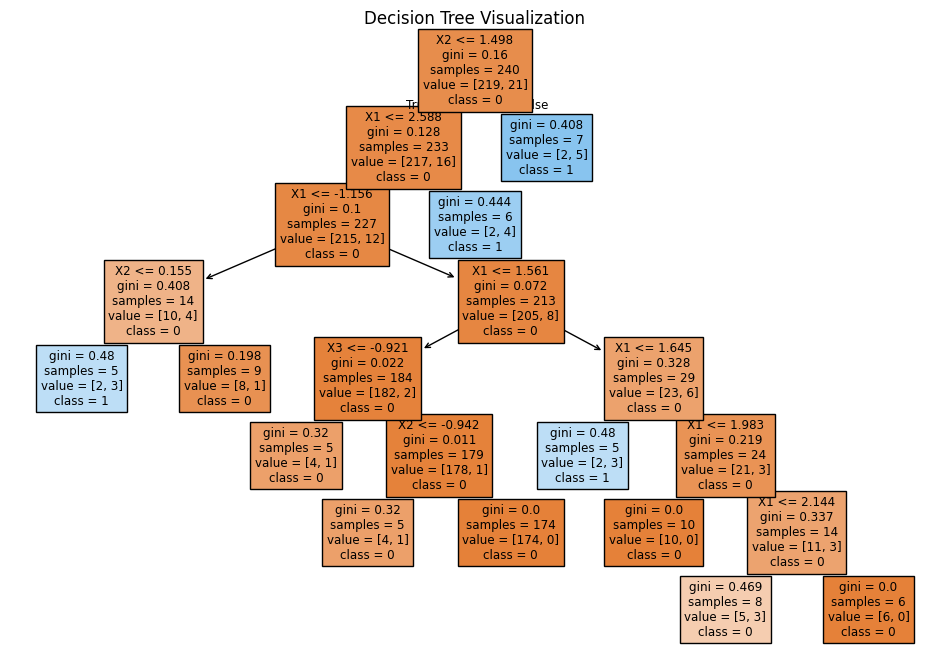

In [27]:
tree = DecisionTreeClassifier(random_state=44, min_samples_leaf=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [28]:
ds = DSClassifierMultiQ(n_clusters, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 8.61s, epochs: 200

Least training loss reached: 0.075


In [29]:
ds.print_most_important_rules(threshold=0.01)



Most important rules for class 0

	[0.632] R2: 0.443 < X1 < 1.148
			0: 0.632	1: 0.000	Unc: 0.368

	[0.597] R5: -0.194 < X2 < 0.257
			0: 0.597	1: 0.000	Unc: 0.403

	[0.568] R1: -0.262 < X1 < 0.443
			0: 0.568	1: 0.000	Unc: 0.432

	[0.563] R11: X3 > 0.290
			0: 0.563	1: 0.000	Unc: 0.437

	[0.533] R9: -0.350 < X3 < -0.030
			0: 0.533	1: 0.000	Unc: 0.467

	[0.494] R6: 0.257 < X2 < 0.708
			0: 0.494	1: 0.000	Unc: 0.506

	[0.456] R10: -0.030 < X3 < 0.290
			0: 0.456	1: 0.000	Unc: 0.544

	[0.410] R0: X1 < -0.262
			0: 0.409	1: 0.001	Unc: 0.589

	[0.389] R4: X2 < -0.194
			0: 0.389	1: 0.000	Unc: 0.611

	[0.360] R3: X1 > 1.148
			0: 0.346	1: 0.030	Unc: 0.624

	[0.358] R7: X2 > 0.708
			0: 0.356	1: 0.004	Unc: 0.640

	[0.296] R8: X3 < -0.350
			0: 0.282	1: 0.030	Unc: 0.688

Most important rules for class 1

	[0.106] R3: X1 > 1.148
			0: 0.346	1: 0.030	Unc: 0.624

	[0.096] R8: X3 < -0.350
			0: 0.282	1: 0.030	Unc: 0.688

	[0.038] R7: X2 > 0.708
			0: 0.356	1: 0.004	Unc: 0.640

	[0.024] R0: X1 

In [30]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.88


## GMM

In [31]:
#dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(moon, gmm_labels, test_size=0.2, random_state=42)


In [32]:
ripper = MultiClassRipperClassifier(random_state=43)
ripper.fit(X_train, y_train)
y_pred_ripper = ripper.predict(X_test)
print(f'Ripper Accuracy: {accuracy_score(y_test, y_pred_ripper):.2f}')

Ripper Accuracy: 0.92


In [33]:
ripper.print_rules()


Reglas para clase: 0
[[X1=-0.95--0.49] V [X1=-0.49--0.077] V [X1=<-0.95] V [X1=0.16-0.43^X3=>0.56] V [X1=-0.077-0.16] V [X1=0.43-0.73^X2=>1.1] V [X1=0.16-0.43^X2=0.39-0.61] V [X1=0.16-0.43^X3=-0.28--0.16] V [X2=0.89-1.1^X1=0.73-1.02] V [X3=>0.56^X1=0.73-1.02] V [X1=0.43-0.73^X2=0.069-0.21] V [X2=0.89-1.1^X1=0.43-0.73] V [X2=0.61-0.89^X3=0.25-0.4]]

Reglas para clase: 1
[[X2=<-0.63^X3=-0.46--0.28] V [X1=1.02-1.29] V [X1=>1.91] V [X1=1.29-1.91] V [X2=-0.63--0.26^X1=0.73-1.02] V [X2=<-0.63] V [X2=-0.26--0.1^X1=0.43-0.73] V [X1=0.43-0.73^X2=-0.1-0.069]]


Decision Tree Accuracy: 0.95


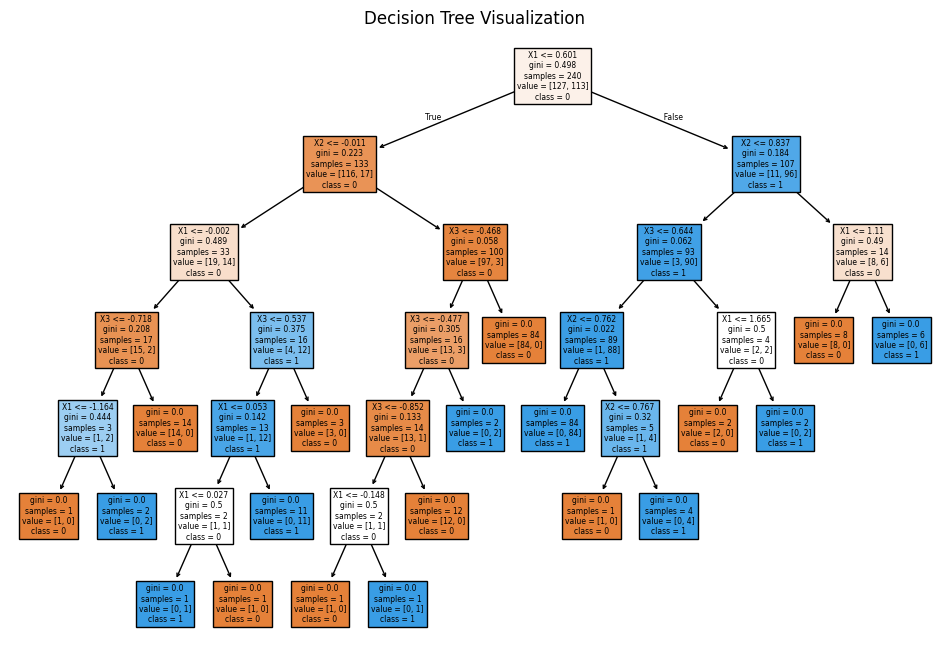

In [34]:
tree = DecisionTreeClassifier(random_state=44)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}')
# tree visualization
plt.figure(figsize=(12, 8))
sk_tree.plot_tree(tree, filled=True, feature_names=moon.columns, class_names=[str(i) for i in np.unique(y_train)])
plt.title('Decision Tree Visualization')
plt.show()

In [35]:
ds = DSClassifierMultiQ(2, min_iter=20, max_iter=200, debug_mode=True, lossfn="MSE", num_workers=0, min_dloss=1e-7)
X_train = X_train.to_numpy()
losses, epoch, dt = ds.fit(X_train, y_train, add_single_rules=True, single_rules_breaks=3, add_mult_rules=False, column_names=moon.columns.tolist())


Optimization started

Training time: 8.90s, epochs: 200

Least training loss reached: 0.075


In [36]:
ds.print_most_important_rules(threshold=0.1)



Most important rules for class 0

	[0.779] R0: X1 < -0.262
			0: 0.779	1: 0.000	Unc: 0.221

	[0.684] R1: -0.262 < X1 < 0.443
			0: 0.684	1: 0.000	Unc: 0.316

	[0.649] R7: X2 > 0.708
			0: 0.649	1: 0.000	Unc: 0.351

	[0.451] R11: X3 > 0.290
			0: 0.451	1: 0.000	Unc: 0.549

	[0.361] R10: -0.030 < X3 < 0.290
			0: 0.360	1: 0.001	Unc: 0.639

	[0.249] R6: 0.257 < X2 < 0.708
			0: 0.249	1: 0.000	Unc: 0.751

Most important rules for class 1

	[0.815] R3: X1 > 1.148
			0: 0.000	1: 0.815	Unc: 0.185

	[0.678] R4: X2 < -0.194
			0: 0.000	1: 0.678	Unc: 0.322

	[0.516] R2: 0.443 < X1 < 1.148
			0: 0.000	1: 0.516	Unc: 0.484

	[0.424] R8: X3 < -0.350
			0: 0.000	1: 0.424	Unc: 0.576

	[0.218] R5: -0.194 < X2 < 0.257
			0: 0.000	1: 0.218	Unc: 0.782

	[0.199] R9: -0.350 < X3 < -0.030
			0: 0.000	1: 0.199	Unc: 0.801


In [37]:
x_test = X_test.to_numpy()
y_pred_ds = ds.predict(x_test)
print(f'DSClassifier Accuracy: {accuracy_score(y_test, y_pred_ds):.2f}')

DSClassifier Accuracy: 0.95
